# Face Detection using Haar Cascades with OpenCV and Matplotlib
### Name :  Pradeep Kumar G 
### Reg. No: 212223230150 
### Slot 4E6-1

#

### 1) Load and Display Images

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img1_gray = cv2.imread("image_01.png", cv2.IMREAD_GRAYSCALE)
img2_gray = cv2.imread("image_02.png", cv2.IMREAD_GRAYSCALE)
img3_gray = cv2.imread("image_03.png", cv2.IMREAD_GRAYSCALE)

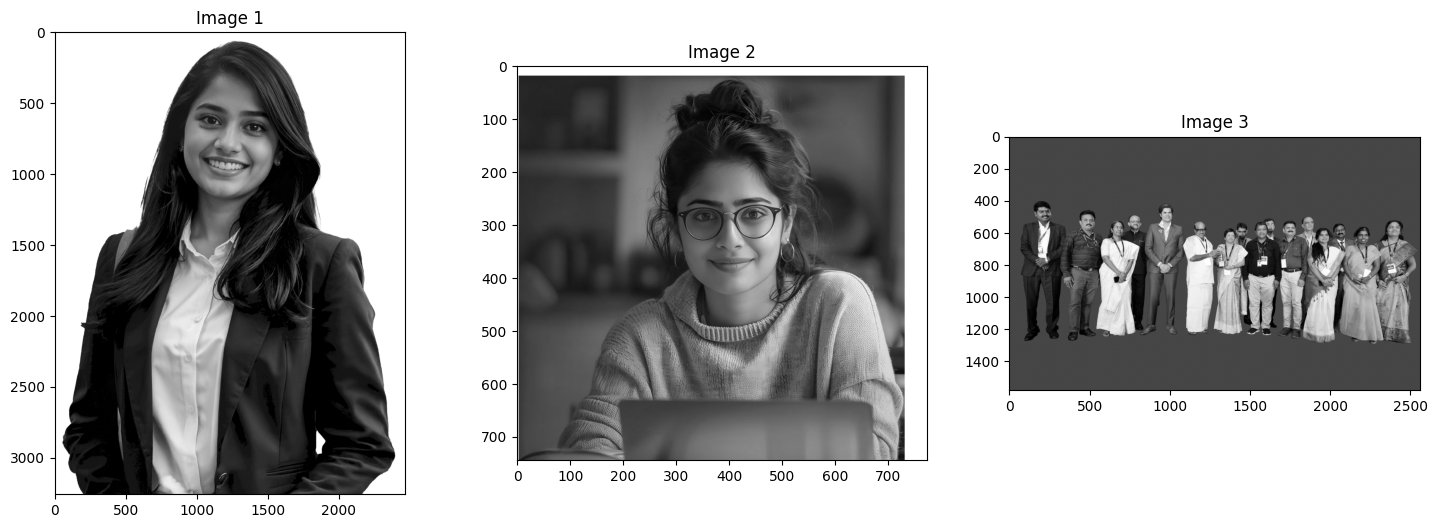

In [3]:
plt.figure(figsize=(18,6))

plt.subplot(131); plt.title("Image 1"); plt.imshow(img1_gray, cmap = "gray")
plt.subplot(132); plt.title("Image 2"); plt.imshow(img2_gray, cmap = "gray")
plt.subplot(133); plt.title("Image 3"); plt.imshow(img3_gray, cmap = "gray")

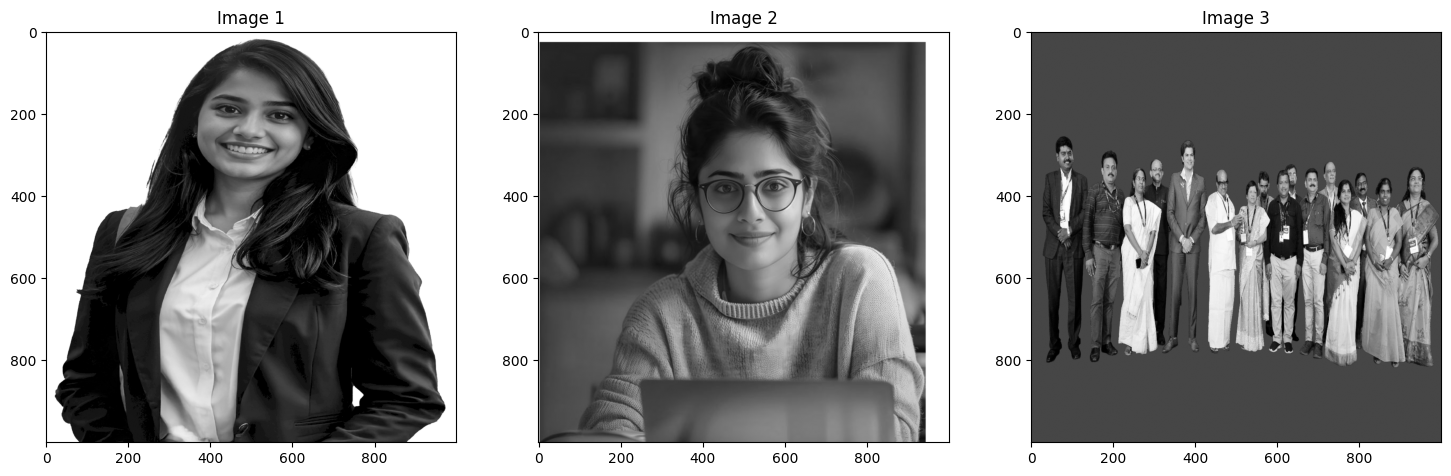

In [4]:
plt.figure(figsize=(18,6))

plt.subplot(131); plt.title("Image 1"); plt.imshow(cv2.resize(img1_gray, (1000, 1000)), cmap = "gray")
plt.subplot(132); plt.title("Image 2"); plt.imshow(cv2.resize(img2_gray, (1000, 1000)), cmap = "gray")
plt.subplot(133); plt.title("Image 3"); plt.imshow(cv2.resize(img3_gray, (1000, 1000)), cmap = "gray")

### 2) Load Haar Cascade Classifiers
OpenCV comes 
- with these
- pre-trained cascade files.

In [5]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

### 3) Perform Face Detection in Images

In [6]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, 1.3, 5)

    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255,255,255), 10)
    return face_img

Text(0.5, 1.0, 'IMAGE 1')

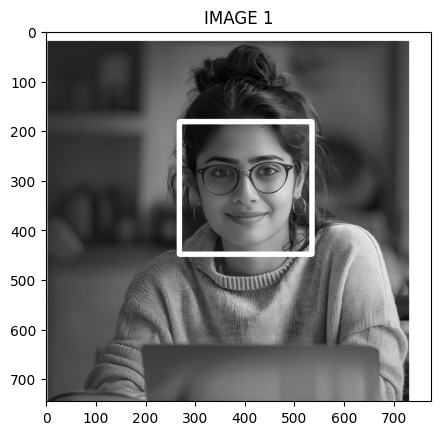

In [7]:
result1 = detect_face(img2_gray)
plt.imshow(result1, cmap = 'gray')
plt.title("IMAGE 1")

Text(0.5, 1.0, 'IMAGE 2')

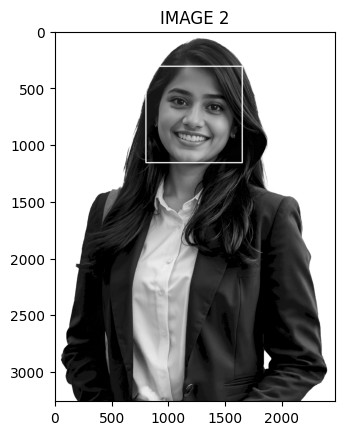

In [8]:
result2 = detect_face(img1_gray)
plt.imshow(result2, cmap = 'gray')
plt.title("IMAGE 2")

Text(0.5, 1.0, 'IMAGE 3')

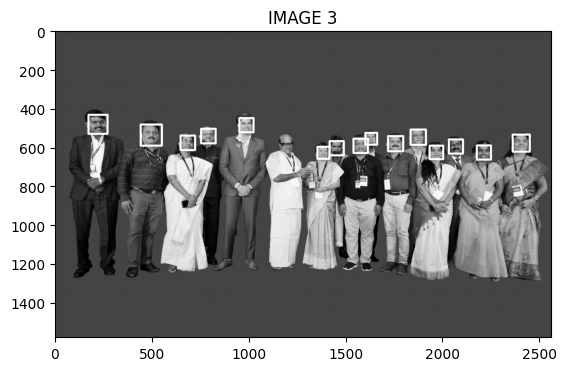

In [9]:
result3 = detect_face(img3_gray)
plt.imshow(result3, cmap = 'gray')
plt.title("IMAGE 3")

### 4) Perform Eye Detection in Images

In [10]:
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")

def detect_eye(img):
    eye_img = img.copy()
    eye_circle = eye_cascade.detectMultiScale(eye_img, 1.3, 8)
    for (x,y,w,h) in eye_circle:
        h = round(h/2)
        w = round(w/2)
        cv2.circle(eye_img, (x+w, y+h), h, (255,255,255), 5)
    return eye_img
    

Text(0.5, 1.0, 'IMAGE 1')

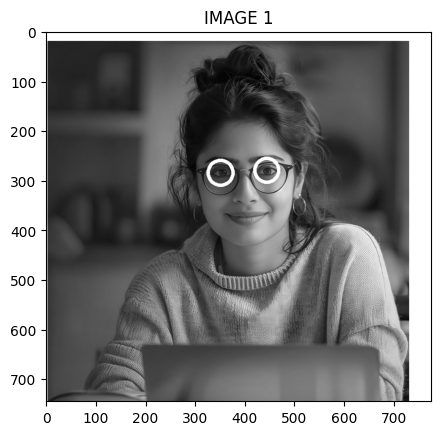

In [11]:
result1 = detect_eye(img2_gray)
plt.imshow(result1, cmap = "gray")
plt.title("IMAGE 1")

Text(0.5, 1.0, 'IMAGE 2')

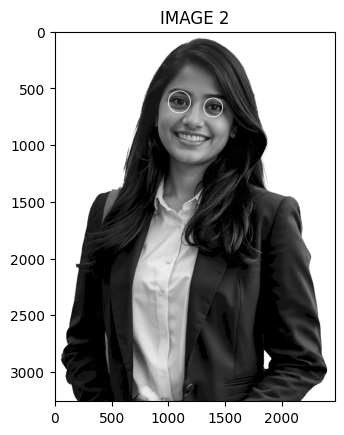

In [12]:
result2 = detect_eye(img1_gray)
plt.imshow(result2, cmap = "gray")
plt.title("IMAGE 2")

### 5) Perform Face Detection on Real-Time Webcam Video

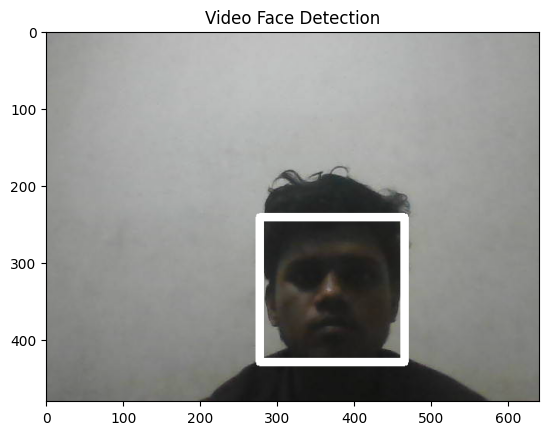

In [ ]:
cap = cv2.VideoCapture(0)

plt.ion()
flag, ax = plt.subplots()

ret, frame = cap.read(0)
face = detect_face(frame)
im = ax.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
plt.title("Video Face Detection")

while True:
    ret, frame = cap.read(0)
    face = detect_face(face)
    im.set_data(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
    plt.pause(0.10)

cap.release()
plt.close()